# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [33]:
import numpy as np
import pandas as pd
import statsmodels as st
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

sns.distributions._has_statsmodels = False

In [82]:
data = pd.read_csv('orange_small_churn_data.txt', engine = 'python')
labels = pd.read_csv('orange_small_churn_labels.txt', engine = 'python', header = None)
data['labels'] = labels[0]

In [94]:
data.loc[:, 'Var198'].value_counts()

fhk21Ss    3557
PHNvXy8     911
iJzviRg     619
9GJGgoz     613
6CXYbuk     454
           ... 
YMfqJYN       1
66sEVfQ       1
b9lTn7V       1
UMZNYN3       1
zSjEEvJ       1
Name: Var198, Length: 3891, dtype: int64

2\. Рассчитайте доли классов `отток` и `не отток`.

In [7]:
print('Доля класса отток: {}'.format(len(labels[0][labels[0] == 1])/len(labels)))
print('Доля класса не отток: {}'.format(len(labels[0][labels[0] == -1])/len(labels)))

Доля класса отток: 0.0744
Доля класса не отток: 0.9256


In [39]:
data_scaled = StandardScaler().fit_transform(data.iloc[:, :190])
data.iloc[:, :190] = data_scaled

C:\Users\kpebe\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:765: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\kpebe\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:706: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [42]:
# ищем корреляции между числовыми признаками и целевой переменной. Так как она бинарная, юзаем кустарный метод из видео 
# про корреляцию категориальных признаков
corrs = []

for col in data.columns[:190]:
    
    corrs.append(np.nanmean(data.loc[:, col][labels[0] == 1]) - np.nanmean(data.loc[:, col][labels[0] == -1]))
    
corrs = np.array(corrs)
idx = (corrs * np.sign(corrs)).argsort()[::-1]
corrs = corrs[idx]
cols = data.columns[:190]
cols = cols[idx]
cols = cols[np.isnan(corrs) == False]
corrs = corrs[np.isnan(corrs) == False]

C:\Users\kpebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
C:\Users\kpebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sign
  # Remove the CWD from sys.path while we load stuff.


4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [54]:
fig, ax = plt.subplots(5, 4, figsize = (20, 16))

for i in range(0, 5):
    
    for j in range(0, 4):
        
        sns.distplot(a = data.loc[:, cols[(i + 1) * (j + 1) - 1]][data['labels'] == 1].dropna(), ax = ax[i][j], 
                    label = '1', kde = True, hist = False)
        
        sns.distplot(a = data.loc[:, cols[(i + 1) * (j + 1) - 1]][data['labels'] == -1].dropna(), ax = ax[i][j], 
                    label = '-1', kde = True, hist = False)
        
#         ax[i][j].set_title(cols[(i + 1) * (j + 1) - 1])

TypeError: pairplot() got an unexpected keyword argument 'kde'

ValueError: array must not contain infs or NaNs

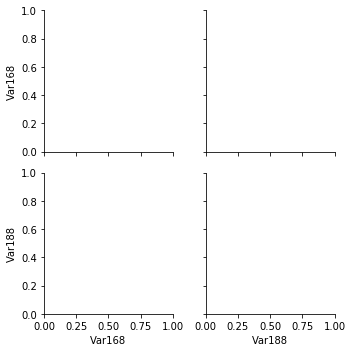

In [58]:
sns.pairplot(data = data, vars = cols[:2], hue = 'labels')

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [73]:
data.loc[:, cols[60]][labels[0] == 1].value_counts()

-0.716274    23
 0.385440     1
 0.855221     1
 0.523229     1
 2.293621     1
-0.325752     1
 2.586027     1
 0.077165     1
 0.912664     1
 1.618967     1
 0.049826     1
 0.608896     1
 2.065081     1
-0.375886     1
 2.877886     1
-0.270892     1
-0.714026     1
-0.652164     1
 0.996068     1
-0.685876     1
 1.089089     1
 2.744653     1
 1.401302     1
-0.308024     1
 1.096525     1
 0.520617     1
-0.264217     1
-0.683087     1
-0.086723     1
 0.212432     1
-0.363820     1
 0.171178     1
 1.489249     1
 1.817924     1
Name: Var69, dtype: int64

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

TypeError: can only concatenate str (not "float") to str

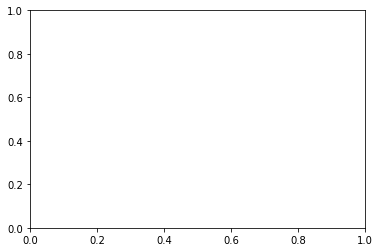

In [76]:
sns.distplot(data.iloc[:, 191])

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?